# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [32]:
import kagglehub
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("ankushpanday1/global-road-accidents-dataset")
print(os.listdir(path))

100%|██████████| 11.7M/11.7M [00:01<00:00, 7.45MB/s]

Extracting files...


['road_accident_dataset.csv']


In [3]:
file_path = os.path.join(path, "road_accident_dataset.csv")
df = pd.read_csv(file_path)
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

1. Country: Negara tempat kecelakaan terjadi.
2. Year: Tahun kejadian kecelakaan.
3. Month: Bulan kejadian kecelakaan.
4. Day of Week: Hari dalam seminggu saat kecelakaan terjadi.
5. Time of Day:  Waktu umum kejadian (pagi/siang/sore/malam).
6. Urban/Rural: Lokasi area (perkotaan atau pedesaan).
7. Road Type: Jenis jalan (jalan raya, jalan kecil, tol, dll).
8. Weather Conditions: Kondisi cuaca saat kecelakaan.
9. Visibility Level: Tingkat jarak pandang pengemudi.
10. Number of Vehicles Involved: Jumlah kendaraan yang terlibat.
11. Speed Limit: Batas kecepatan di lokasi.
12. Driver Age Group: Kelompok usia pengemudi.
13. Driver Gender: Jenis kelamin pengemudi.
14. Driver Alcohol Level: Kadar alkohol pengemudi.
15. Driver Fatigue: Indikasi kelelahan pengemudi.
16. Vehicle Condition: Kondisi kendaraan (baik/rusak).
17. Pedestrians Involved: Jumlah pejalan kaki yang terlibat.
18. Cyclists Involved: Jumlah pesepeda yang terlibat.
19. Accident Severity: Tingkat keparahan kecelakaan.
20. Number of Injuries: Jumlah korban luka-luka.
21. Number of Fatalities: Jumlah korban meninggal.
22. Emergency Response Time: Waktu respon darurat.
23. Traffic Volume: Kepadatan lalu lintas di area tersebut.
24. Road Condition: Kondisi jalan (basah, kering, rusak, dll).
25. Accident Cause: Penyebab utama kecelakaan.
26. Insurance Claims: Jumlah klaim asuransi terkait kecelakaan.
27. Medical Cost: Biaya medis akibat kecelakaan.
28. Economic Loss: Kerugian ekonomi akibat kecelakaan.
29. Region: Wilayah administrasi dalam negara tersebut.
30. Population Density: Kepadatan penduduk di area kejadian.

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Age Group', 'Driver Gender', 'Vehicle Condition', 'Accident Severity', 'Road Condition', 'Accident Cause', 'Region']
Numerical Columns: ['Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved', 'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Economic Loss', 'Population Density']


**Categorical Columns**

Kolom-kolom ini berisi nilai berupa kategori atau label, bukan angka yang dapat dihitung langsung. Biasanya digunakan untuk analisis frekuensi, encoding, dan visualisasi distribusi.
Isinya mencakup informasi tentang lokasi, waktu, kondisi pengemudi, kondisi jalan, penyebab kecelakaan, dan karakteristik wilayah seperti: negara, bulan, hari, jenis jalan, cuaca, usia pengemudi, kondisi kendaraan, tingkat keparahan kecelakaan, penyebab kecelakaan, dan region.

**Numerical Columns**

Kolom ini berisi data angka yang dapat dianalisis secara statistik, seperti mean, median, korelasi, dan digunakan langsung dalam pemodelan.
Isinya mencakup angka kejadian, kondisi lingkungan, karakteristik kecelakaan, kerugian, dan faktor risiko seperti: tahun, jarak pandang, jumlah kendaraan, batas kecepatan, kadar alkohol, jumlah korban, waktu respons darurat, volume lalu lintas, biaya medis, kerugian ekonomi, dan kepadatan penduduk.

In [6]:
# Compute the number of unique values for all features
df_nunique = df.nunique().reset_index()
df_nunique.columns = ['column_name', 'unique_value_count']
df_nunique['unique_ratio'] = df_nunique['unique_value_count'] / df.shape[0]
df_nunique = df_nunique.sort_values(by='unique_ratio', ascending=False)
df_nunique

,column_name,unique_value_count,unique_ratio
13,Driver Alcohol Level,132000,1.000000
8,Visibility Level,132000,1.000000
22,Traffic Volume,132000,1.000000
29,Population Density,132000,1.000000
27,Economic Loss,132000,1.000000
21,Emergency Response Time,132000,1.000000
26,Medical Cost,132000,1.000000
10,Speed Limit,90,0.000682
1,Year,25,0.000189
19,Number of Injuries,20,0.000152


* Kolom dengan unique_ratio 1.0 adalah fitur numerik murni dengan variasi tinggi.

* Kolom dengan unique_ratio rendah adalah fitur kategorikal yang nilai-nilainya berulang.

## 2. Missing Value

In [7]:
# Check for missing values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population D

Hasil menunjukkan bahwa seluruh kolom dalam dataset memiliki 0 missing values

## 3. Duplicate Data

In [8]:
# Display number of duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


Jumlah baris duplikat adalah 0

## 4. Univariate Analysis

In [9]:
categorical_cols = ['Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
                    'Road Type', 'Weather Conditions', 'Driver Age Group', 'Driver Gender',
                    'Vehicle Condition', 'Accident Severity', 'Road Condition',
                    'Accident Cause', 'Region']

numerical_cols = ['Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit',
                  'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved',
                  'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time',
                  'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
                  'Population Density']

### Kolom Numerik

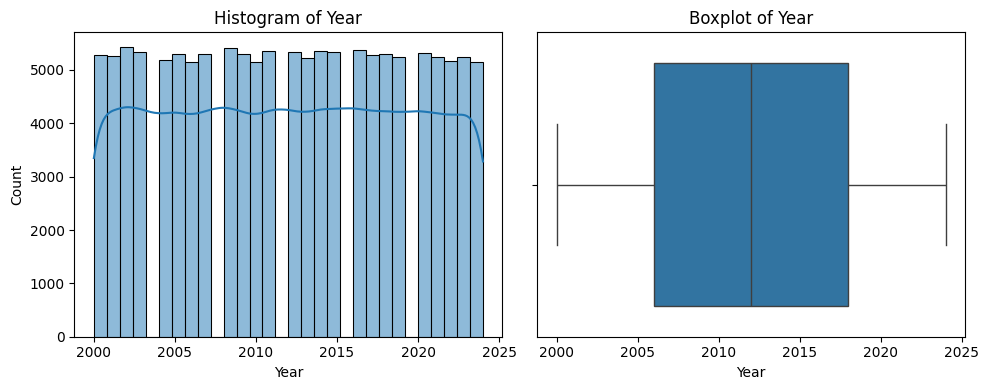

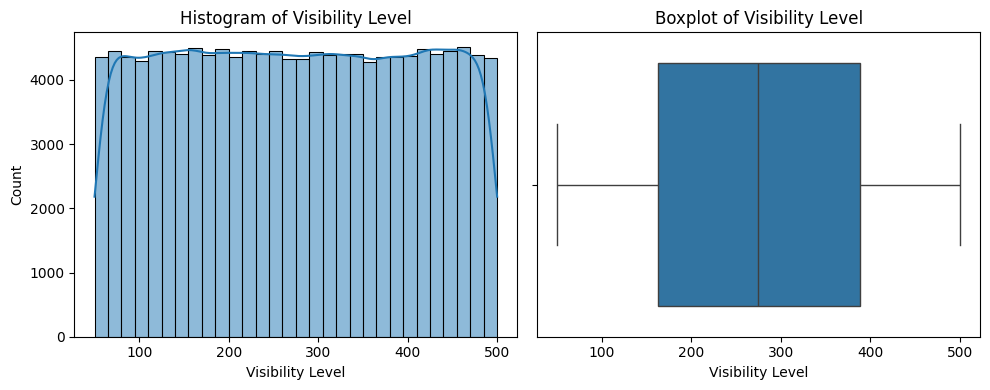

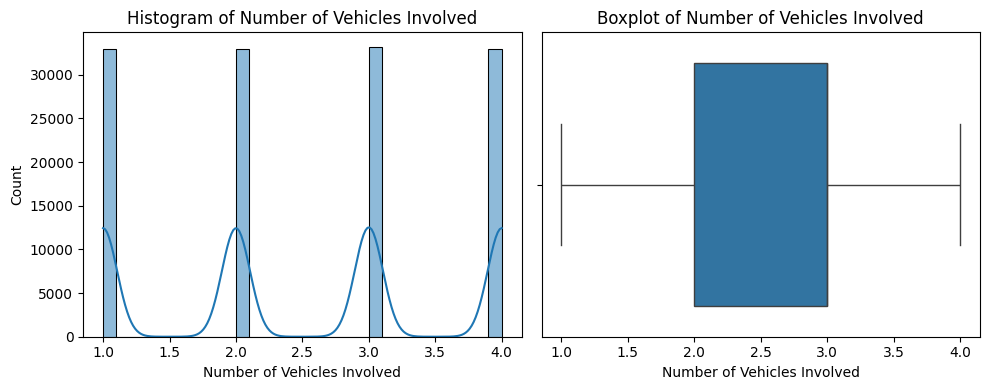

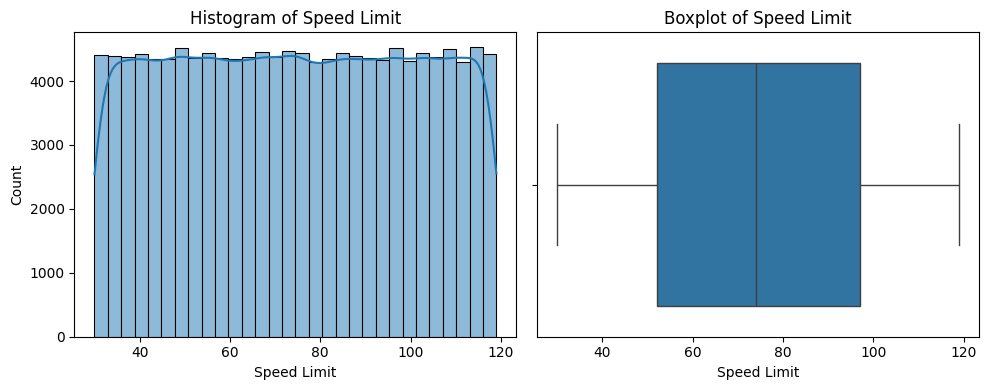

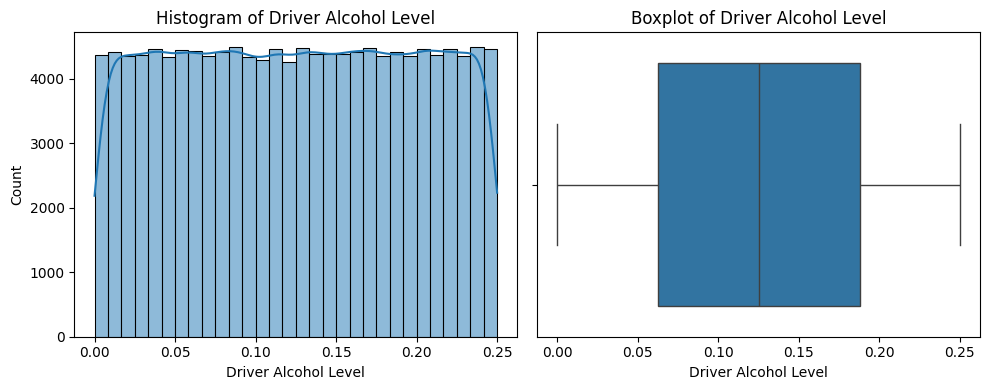

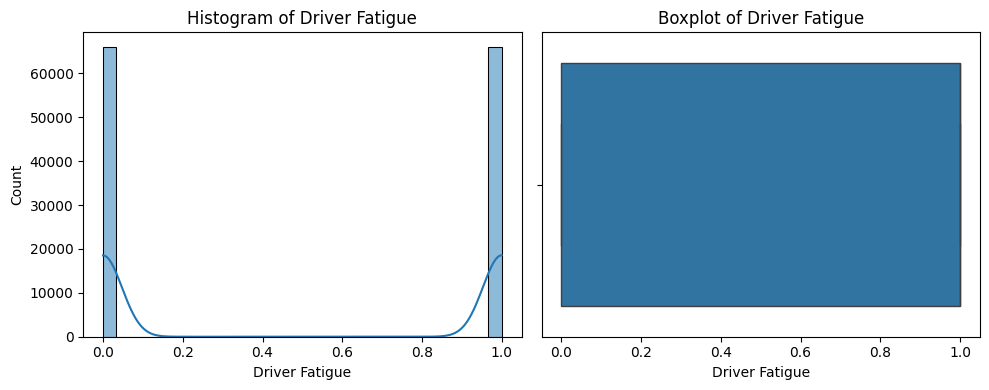

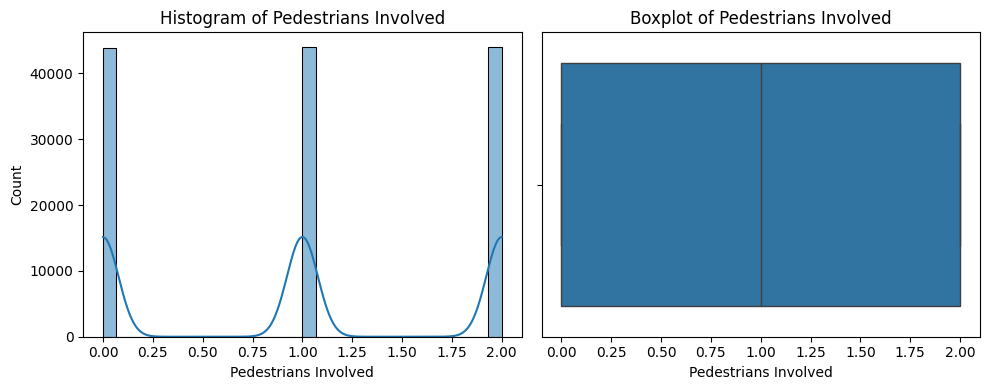

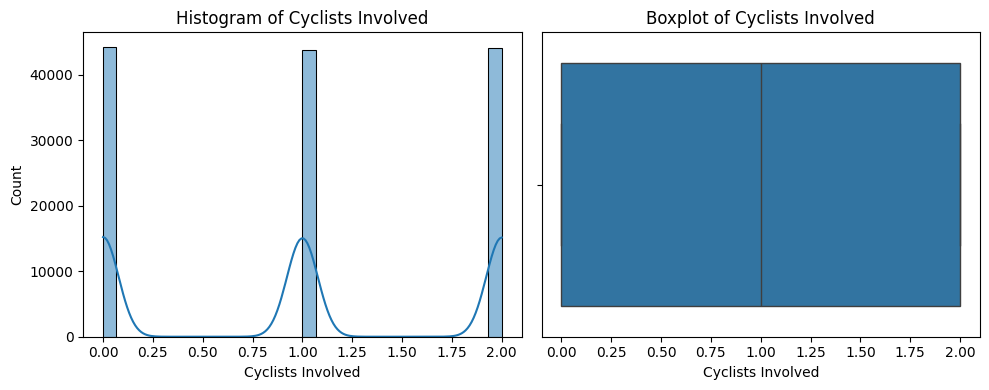

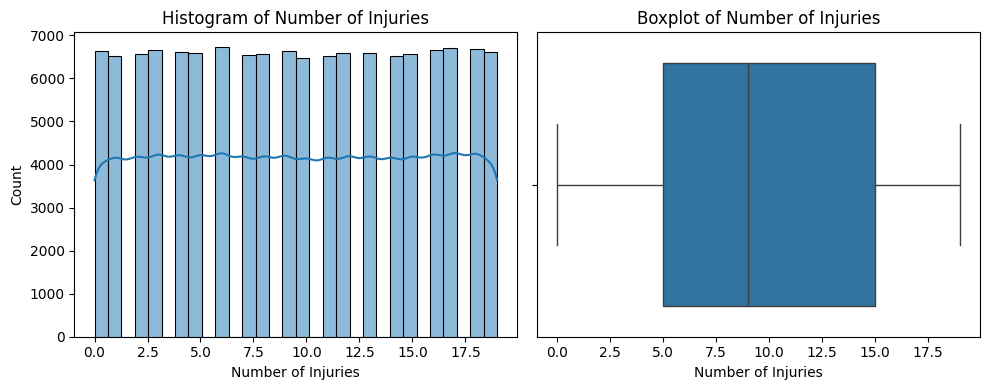

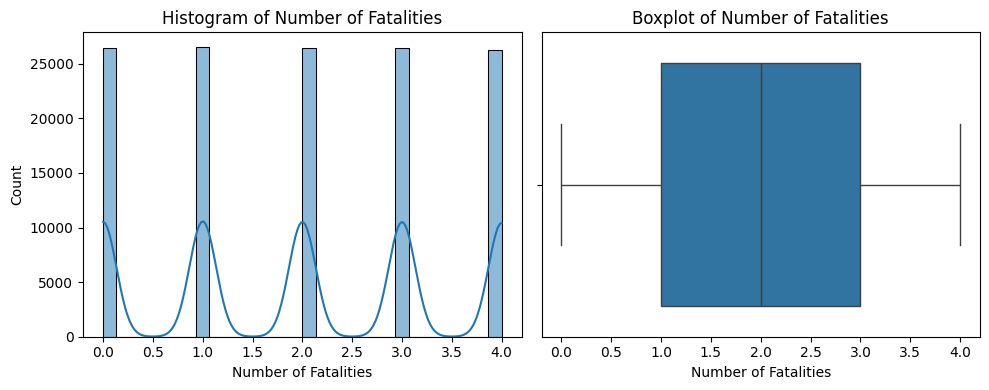

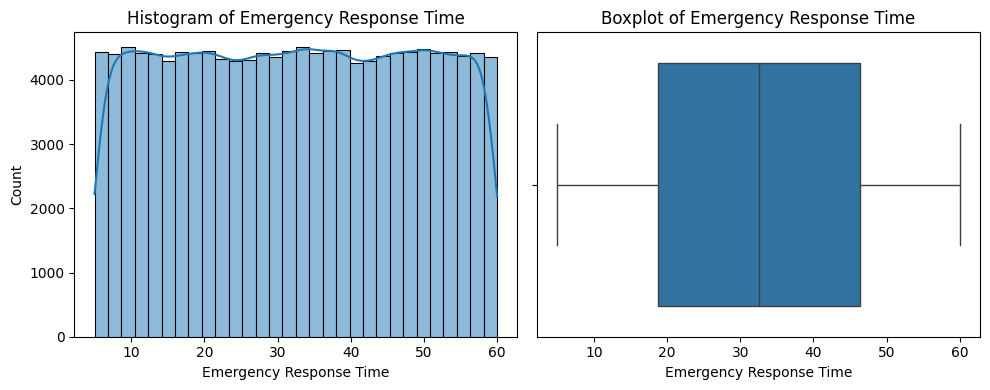

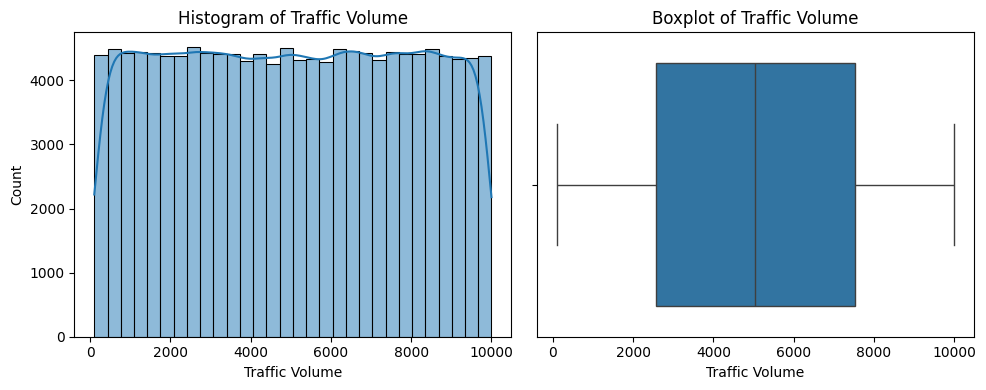

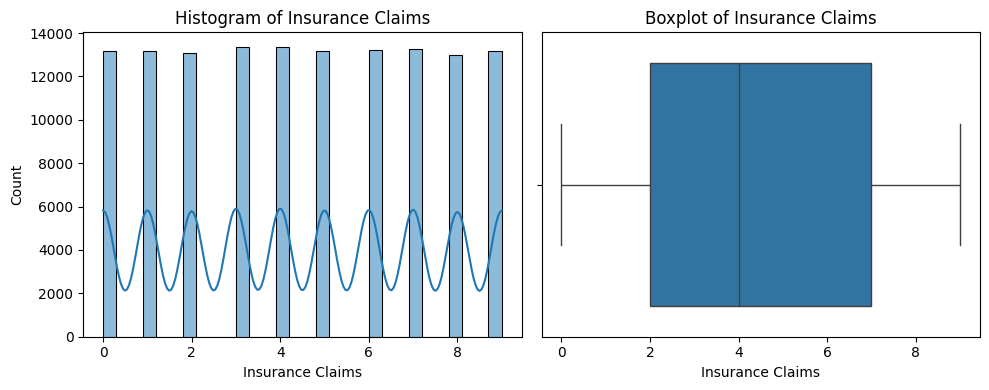

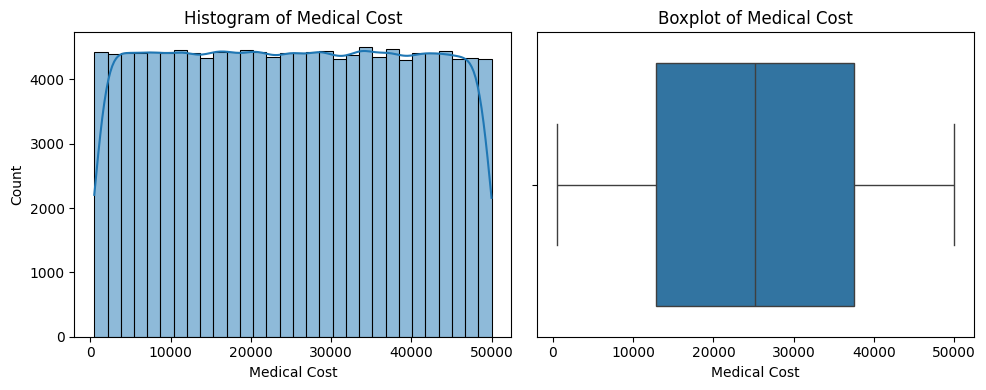

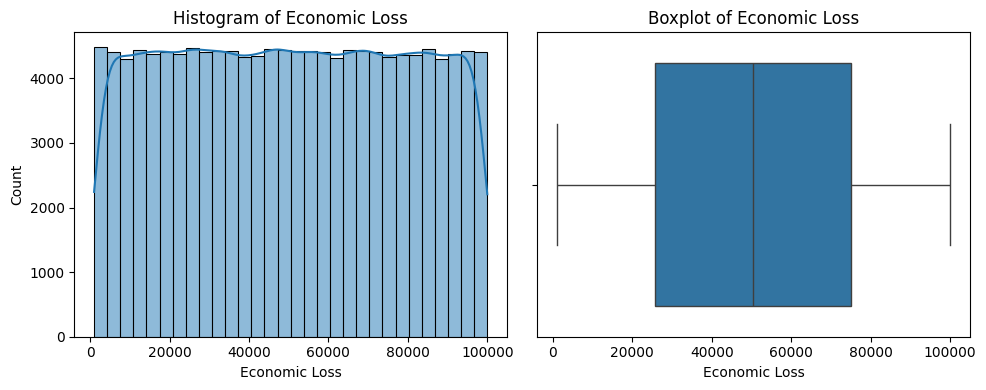

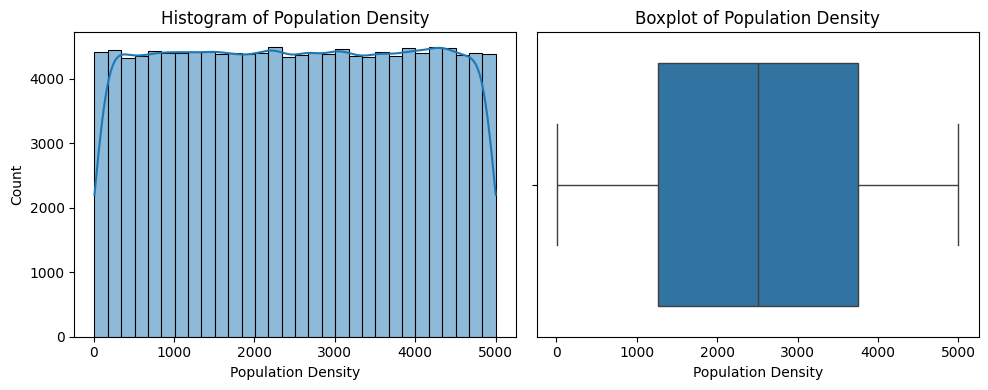

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

**Year**

Distribusi merata dari 2000–2024, tanpa outlier — data stabil setiap tahun.

**Visibility Level**

Sebaran hampir uniform dari 50–500 meter, tanpa nilai ekstrem menonjol.

**Number of Vehicles Involved**

Nilai hanya 1–4, distribusi seimbang — kasus multi-kendaraan cukup umum.

**Speed Limit**

Rentang 30–120 km/h, distribusi merata — menggambarkan variasi jenis jalan.

**Driver Alcohol Level**

Nilai 0.00–0.25, rata merata — tidak ada lonjakan atau pola ekstrem.

**Driver Fatigue**

Biner (0/1) dengan distribusi seimbang — sekitar setengah kasus terkait kelelahan.

**Pedestrians Involved**

Hanya 0, 1, dan 2 — mayoritas melibatkan sedikit pejalan kaki.

**Cyclists Involved**

Sama seperti pejalan kaki: nilai 0–2, distribusi seimbang.

**Number of Injuries**

Rentang 0–19, sebaran hampir uniform — tidak ada outlier signifikan.

**Number of Fatalities**

Nilai 0–4, distribusi setara — kasus fatalitas tinggi jarang.

**Emergency Response Time**

Distribusi merata pada rentang 5–60 menit, tanpa outlier dominan — menunjukkan variasi waktu respons yang konsisten.

**Insurance Claims**

Hanya bernilai 0–9 dan tersebar merata. Tidak ada pola khusus, mencerminkan jumlah klaim bervariasi namun tetap dalam batas kecil.

**Medical Cost**

Nilai 500–50.000 dengan distribusi hampir seragam. Tidak ada lonjakan ekstrem — biaya medis relatif tersebar merata di seluruh rentang.

**Economic Loss**

Rentang 1.000–100.000, distribusi juga merata — menunjukkan variasi kerugian ekonomi yang luas namun tanpa outlier mencolok.

### Kolom Kategorikal

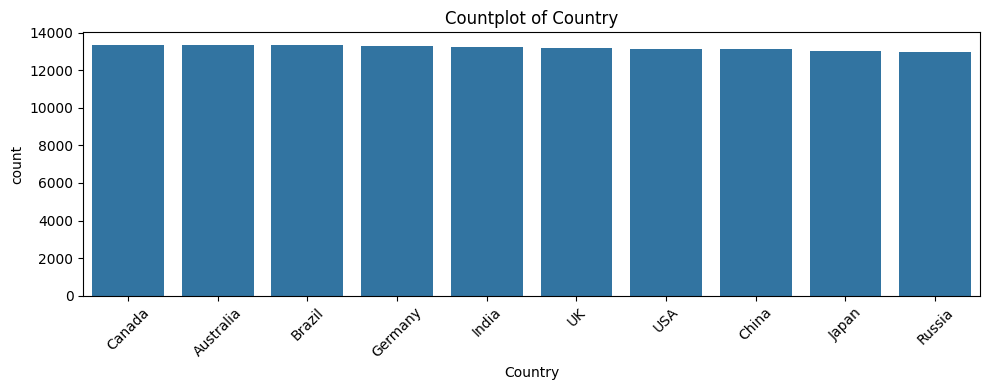

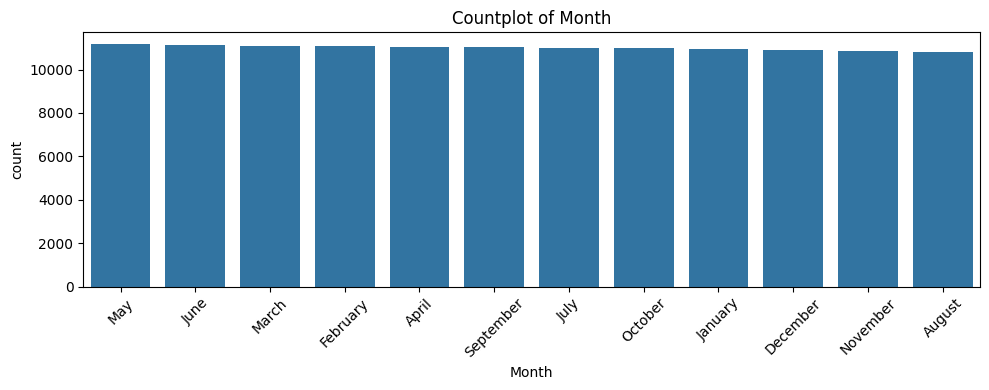

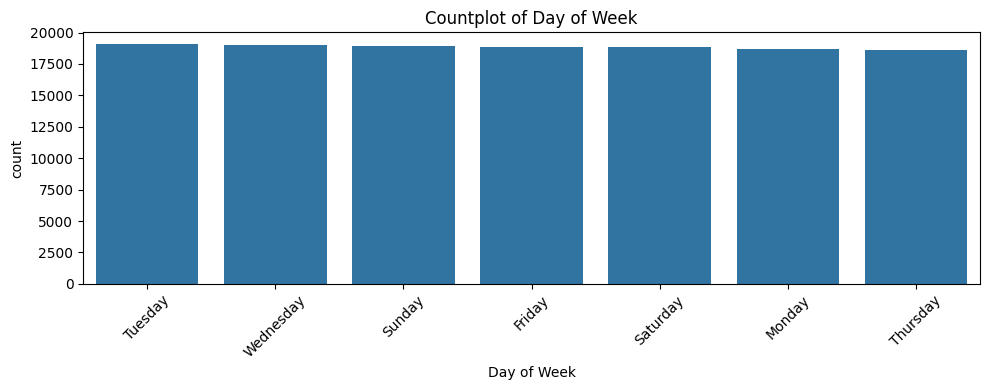

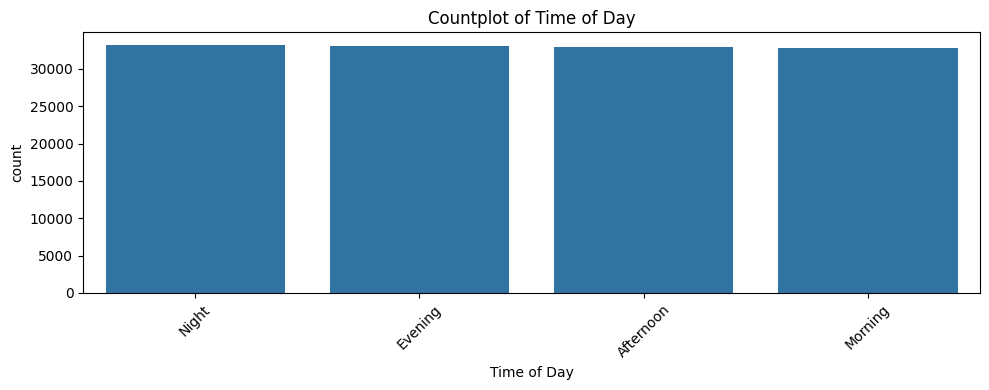

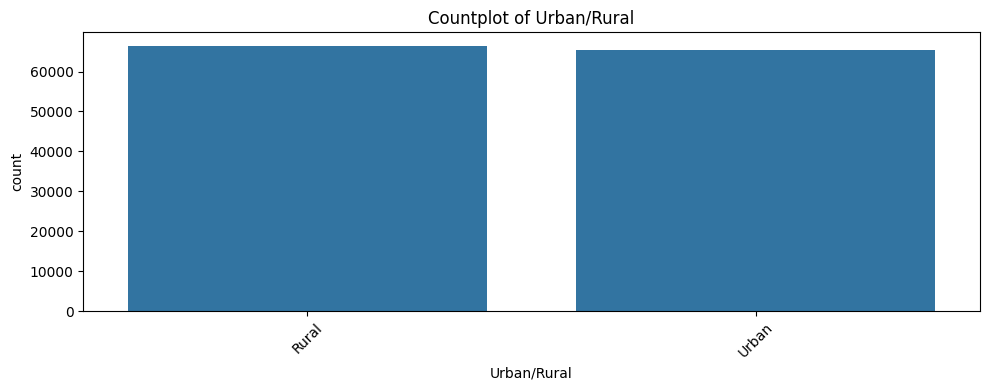

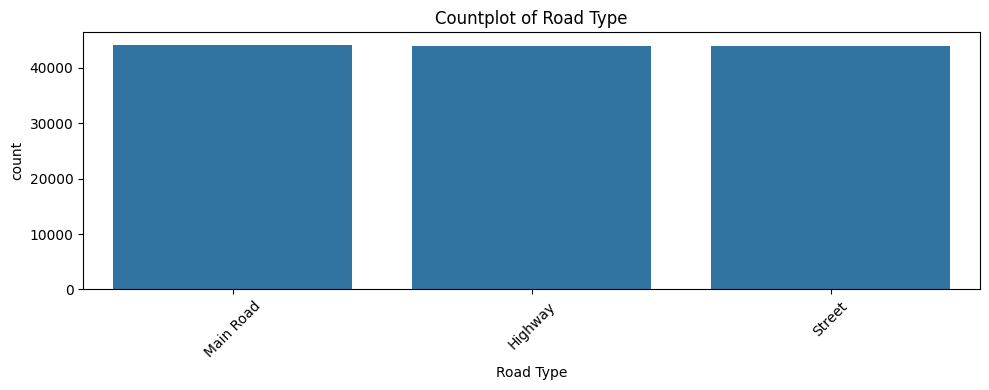

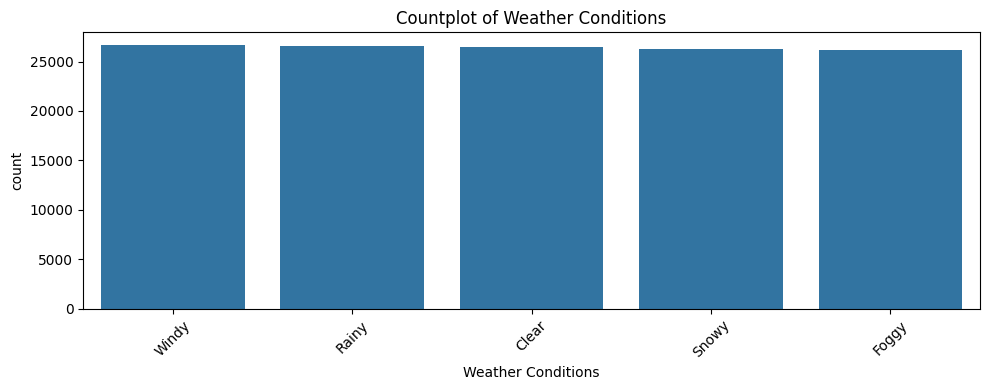

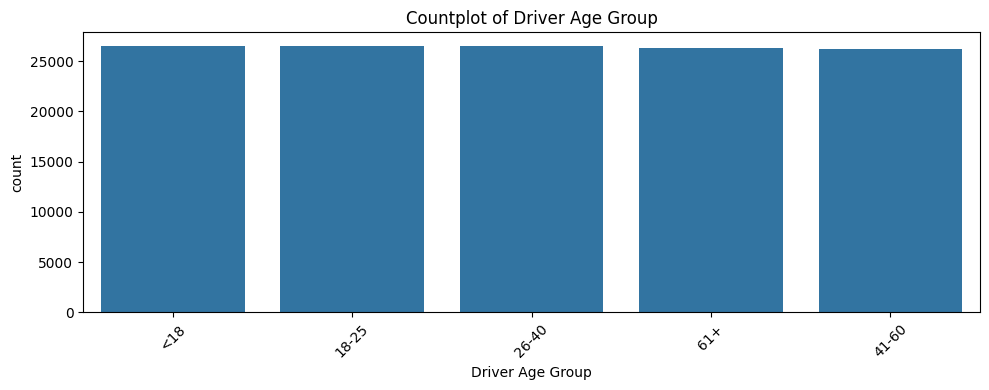

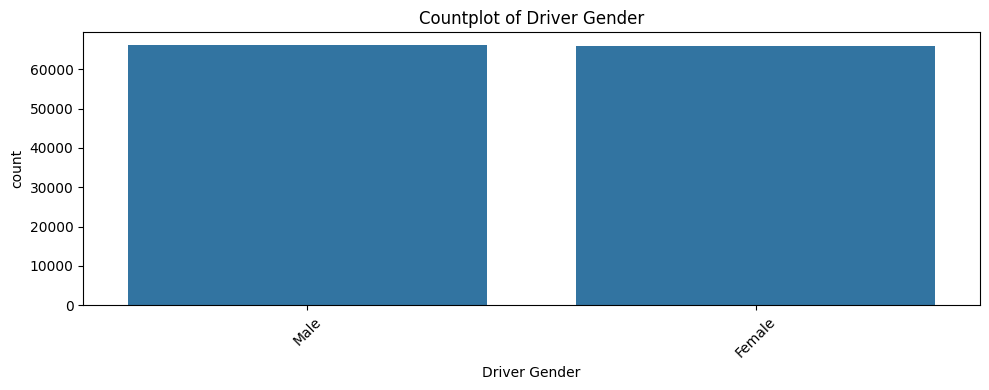

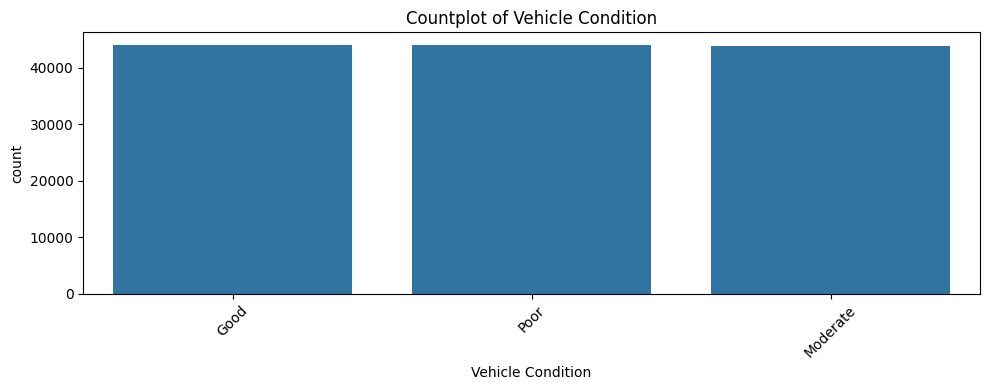

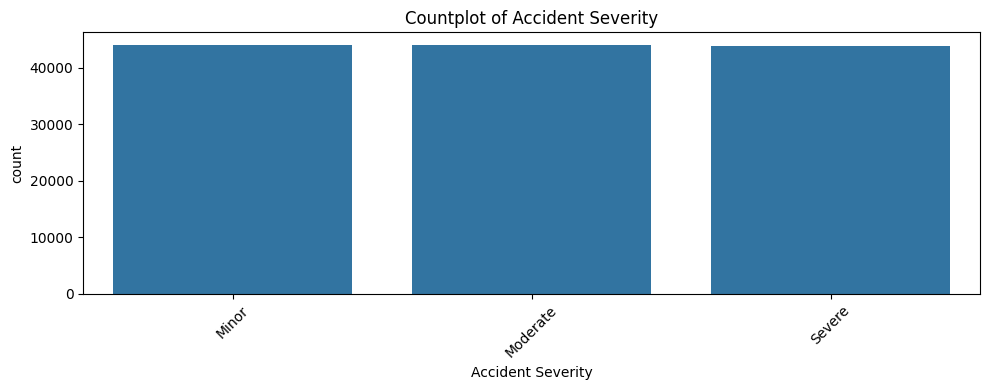

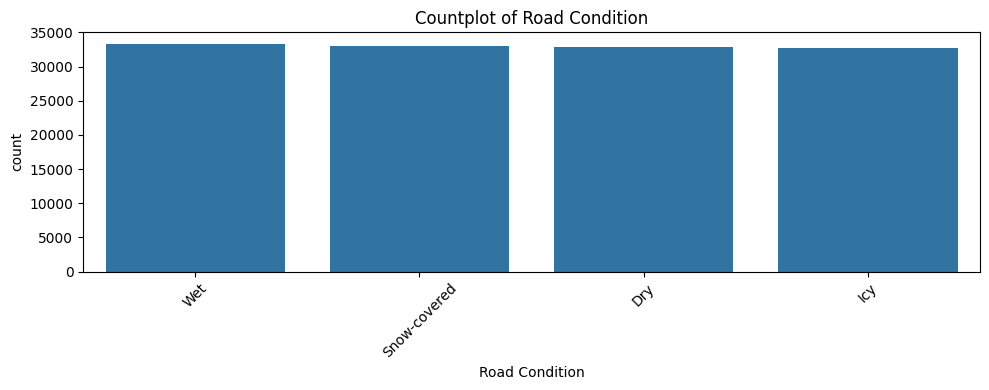

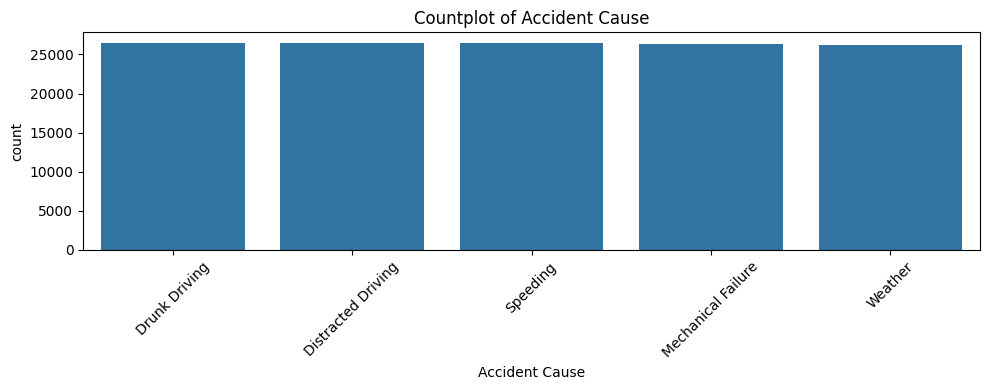

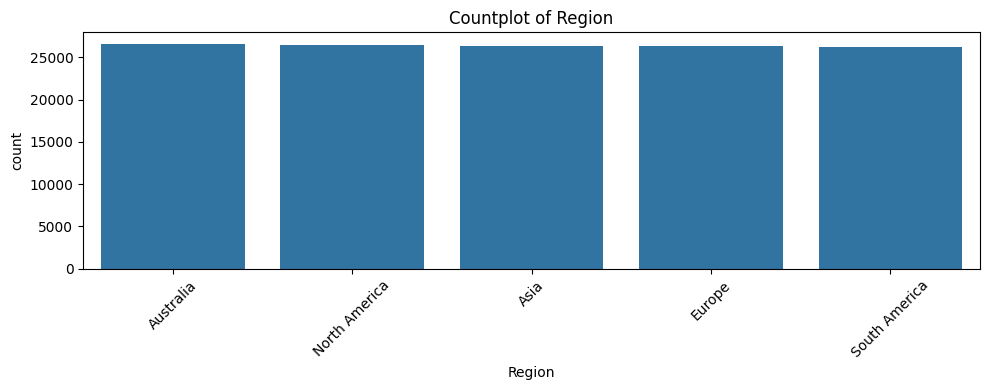

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))

    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

**Country**

Semua negara memiliki jumlah kecelakaan hampir sama — distribusi seimbang.

**Month**

Setiap bulan memiliki jumlah kasus yang mirip — tidak ada puncak musiman.

**Day of Week**

Distribusi merata di semua hari — kecelakaan terjadi konsisten setiap hari.

**Time of Day**

Morning, Afternoon, Evening, dan Night muncul dengan frekuensi hampir sama.

**Urban/Rural**

Kejadian di area Urban dan Rural hampir seimbang.

**Road Type**

Main Road, Highway, dan Street memiliki jumlah kasus yang setara.

**Weather Conditions**

Semua kondisi cuaca (Clear, Rainy, Snowy, Foggy, Windy) muncul merata.

**Driver Age Group**

Setiap kelompok usia memiliki jumlah kejadian yang hampir sama.

**Driver Gender**

Laki-laki dan perempuan terlibat dalam jumlah yang sangat seimbang.

**Vehicle Condition**

Kondisi kendaraan (Good, Poor, Moderate) muncul dengan frekuensi hampir identik.

**Accident Severity**

Minor, Moderate, dan Severe muncul dengan jumlah hampir sama — distribusi seimbang.

**Road Condition**

Wet, Snow-covered, Dry, dan Icy memiliki frekuensi yang setara — tidak ada kondisi jalan yang dominan.

**Accident Cause**

Lima penyebab utama (Drunk Driving, Distracted Driving, Speeding, Mechanical Failure, Weather) semuanya muncul dengan jumlah yang hampir identik.

**Region**

Setiap region (Australia, North America, Asia, Europe, South America) memiliki jumlah kejadian yang seragam.

## 5. Correlation

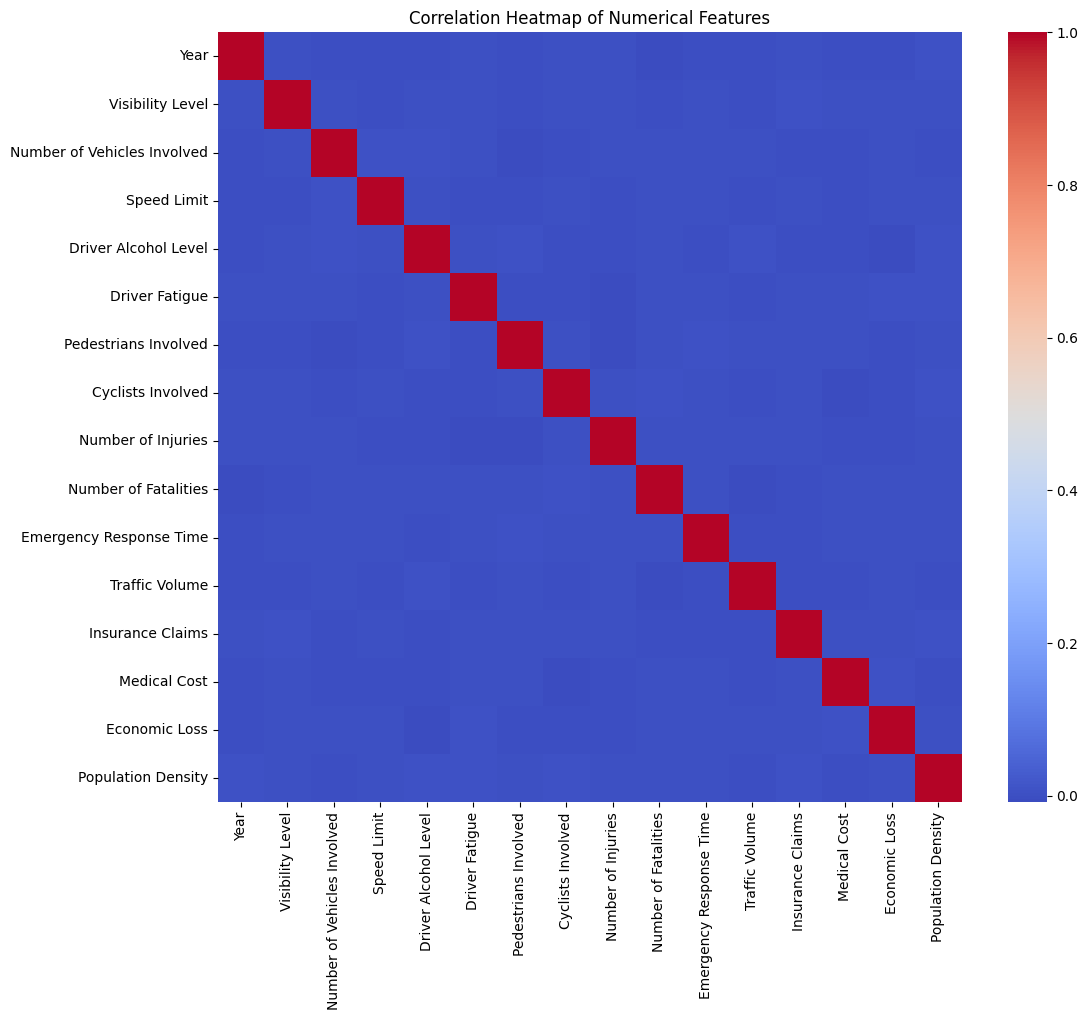

In [12]:
plt.figure(figsize=(12,10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Heatmap menunjukkan bahwa semua fitur numerik memiliki korelasi yang sangat rendah satu sama lain (mendekati 0).

## 6. Bivariate Analysis

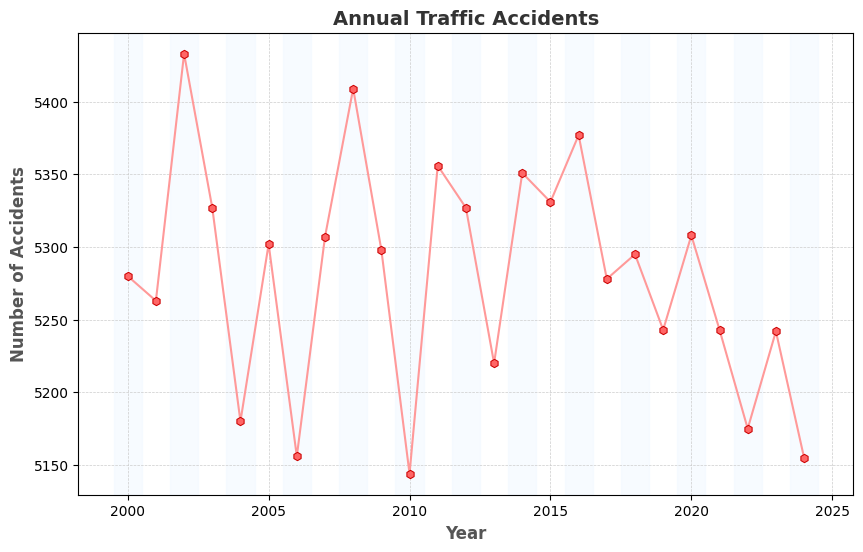

In [13]:
# Accidents by Year
accidents_per_year = df.groupby('Year')['Year'].count()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Add striped background effect
years = accidents_per_year.index
for i, year in enumerate(years):
    if i % 2 == 0:  # Alternate stripes
        ax.axvspan(year - 0.5, year + 0.5, color='#f0f8ff', alpha=0.5)

# Plot line with light colors
sns.lineplot(x=years, y=accidents_per_year.values, marker='h', linestyle='-',
             color='#ff9999', markerfacecolor='#ff6666',
             markeredgecolor='#cc0000')

# Set labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold', color='#555')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold', color='#555')
plt.title('Annual Traffic Accidents', fontsize=14, fontweight='bold',
          color='#333')

# Show grid with light lines
plt.grid(color='#cccccc', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

Grafik menunjukkan jumlah kecelakaan tiap tahun dari 2000–2024. Polanya relatif stabil di kisaran 5.150–5.450 kasus per tahun, tanpa tren naik atau turun yang jelas. Fluktuasi bersifat kecil dan acak, menandakan tidak ada perubahan signifikan pada jumlah kecelakaan tahunan selama periode tersebut.

/tmp/ipython-input-3242143244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Day of Week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")


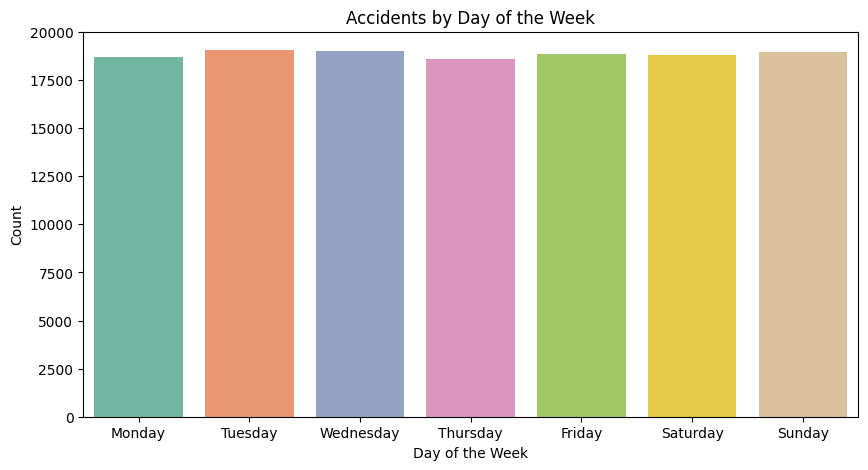

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Day of Week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

Jumlah kecelakaan hampir sama setiap hari — tidak ada hari dengan lonjakan signifikan.

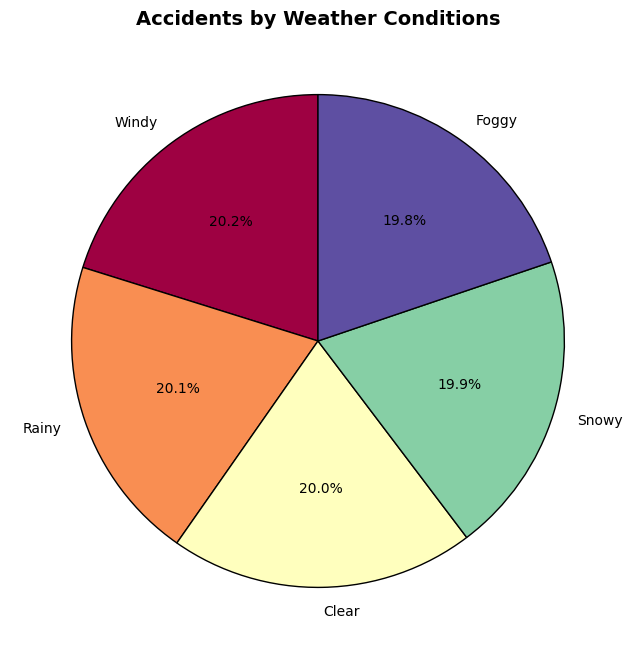

In [15]:
plt.figure(figsize=(8, 8))
df['Weather Conditions'].value_counts().plot.pie(autopct="%1.1f%%", cmap="Spectral", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Accidents by Weather Conditions", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

Semua kondisi cuaca (Windy, Rainy, Clear, Snowy, Foggy) menyumbang proporsi kecelakaan yang hampir identik.

/tmp/ipython-input-3028194558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Urban/Rural"], palette="Set1")


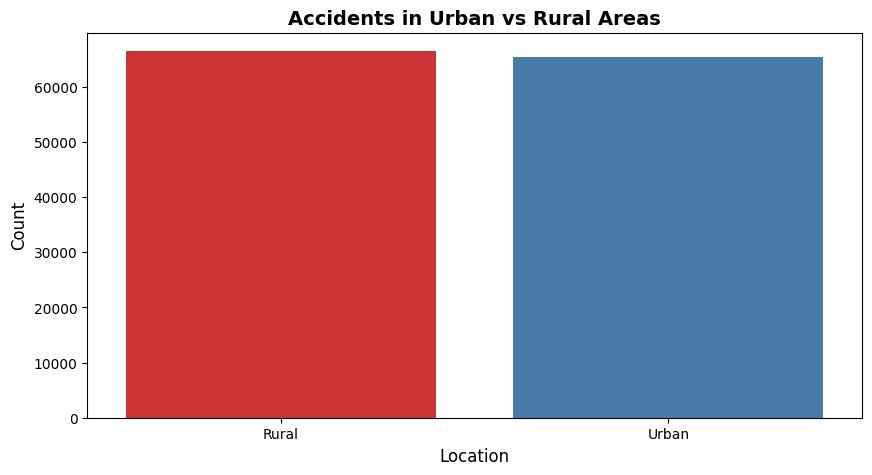

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Urban/Rural"], palette="Set1")
plt.title("Accidents in Urban vs Rural Areas", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Perbedaan antara kecelakaan di area Urban dan Rural sangat kecil — distribusi seimbang.

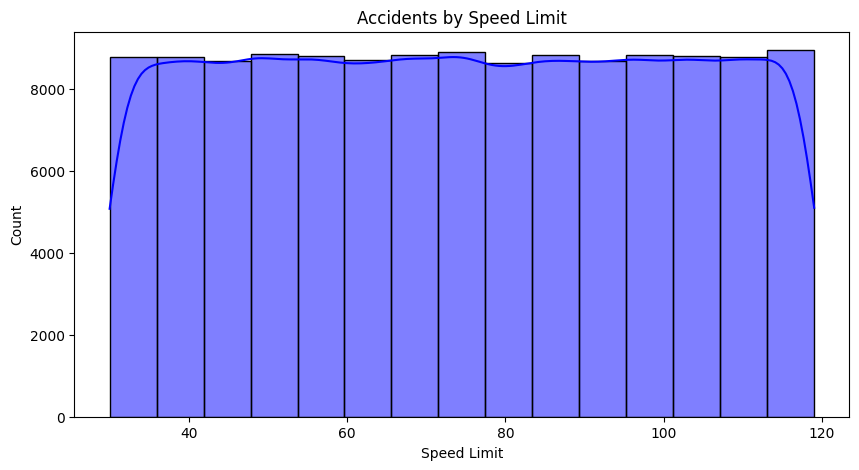

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Speed Limit'], bins=15, kde=True, color="blue")
plt.title("Accidents by Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.show()

Kecelakaan terjadi merata di berbagai batas kecepatan, tanpa titik dominan tertentu.

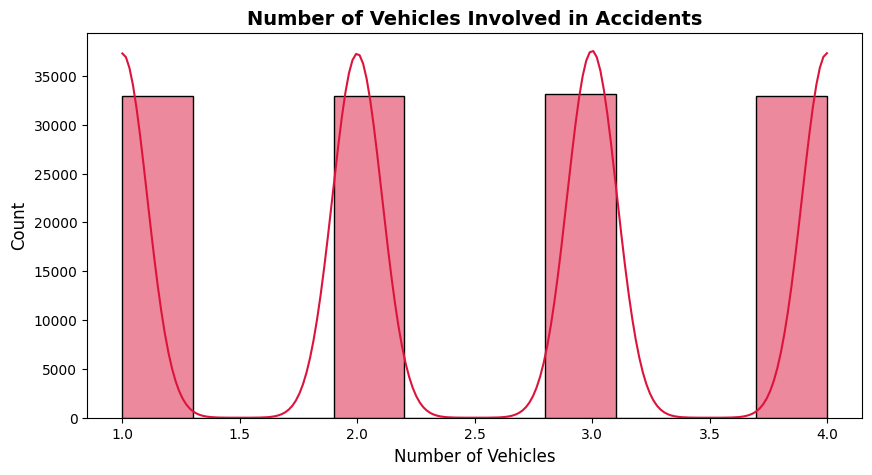

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Number of Vehicles Involved'], bins=10, kde=True, color="crimson")
plt.title("Number of Vehicles Involved in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Kecelakaan paling sering melibatkan 1–4 kendaraan, dengan jumlah yang relatif seimbang.

/tmp/ipython-input-1950889886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Accident Severity"], y=df["Emergency Response Time"], palette="Dark2")


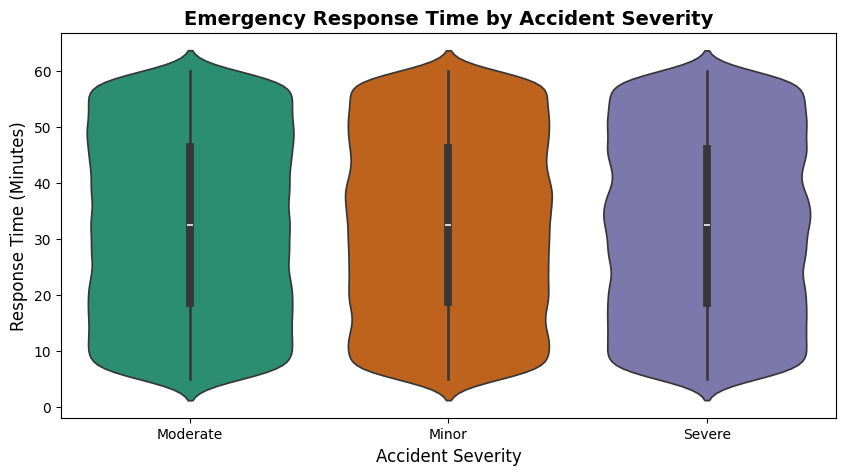

In [19]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Accident Severity"], y=df["Emergency Response Time"], palette="Dark2")
plt.title("Emergency Response Time by Accident Severity", fontsize=14, fontweight='bold')
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Response Time (Minutes)", fontsize=12)
plt.show()

Waktu respons darurat serupa antara Minor, Moderate, dan Severe — tidak ada perbedaan mencolok.

/tmp/ipython-input-1638694556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Accident Severity"], y=df["Driver Alcohol Level"], palette="Dark2")


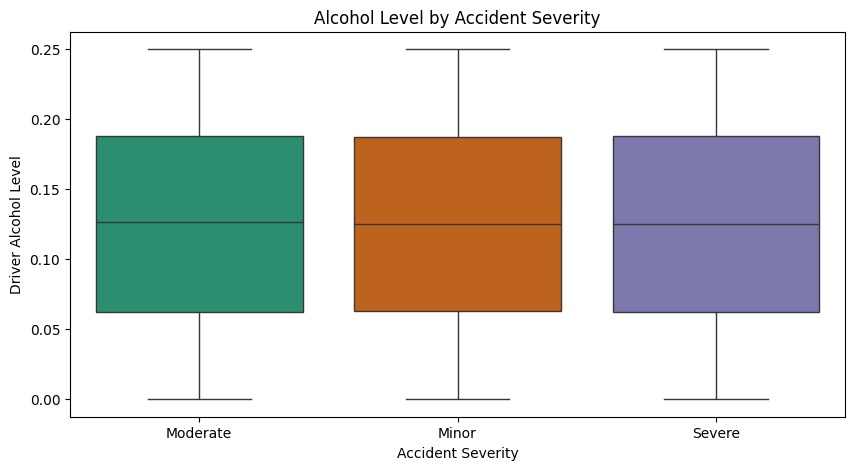

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Accident Severity"], y=df["Driver Alcohol Level"], palette="Dark2")
plt.title("Alcohol Level by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Driver Alcohol Level")
plt.show()

Tingkat alkohol pengemudi hampir sama pada semua tingkat keparahan kecelakaan.

/tmp/ipython-input-2855463874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Driver Fatigue"], palette="Set3")


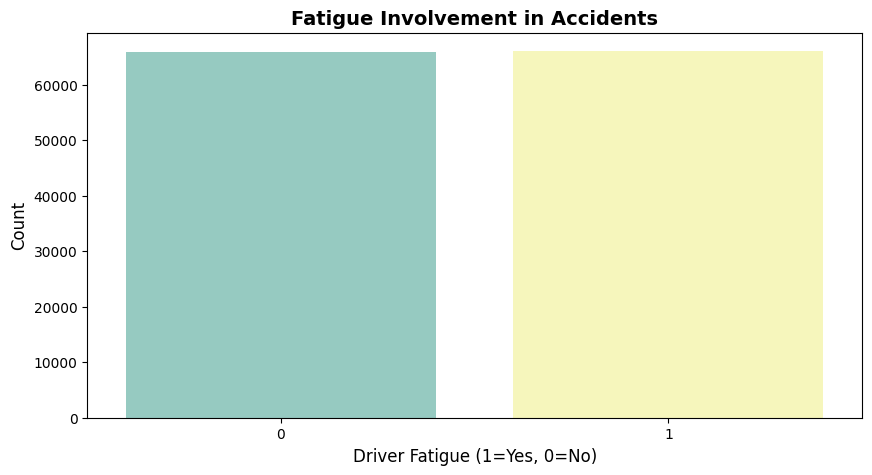

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Driver Fatigue"], palette="Set3")
plt.title("Fatigue Involvement in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Driver Fatigue (1=Yes, 0=No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Pengemudi lelah dan tidak lelah muncul dengan frekuensi hampir sama.

/tmp/ipython-input-2836347588.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Traffic Volume'], shade=True, color="orangered")


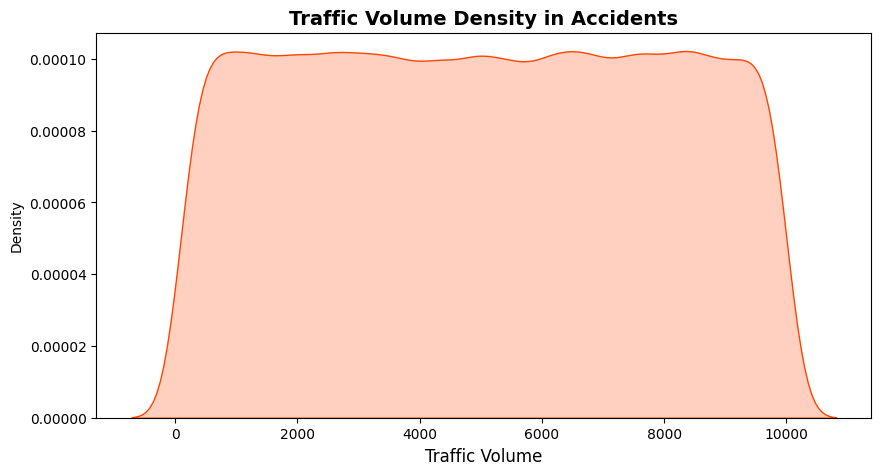

In [22]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Traffic Volume'], shade=True, color="orangered")
plt.title("Traffic Volume Density in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Volume", fontsize=12)
plt.show()

Kecelakaan tersebar merata di seluruh rentang volume lalu lintas.

/tmp/ipython-input-3558739177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Accident Cause"], order=df["Accident Cause"].value_counts().index, palette="magma")


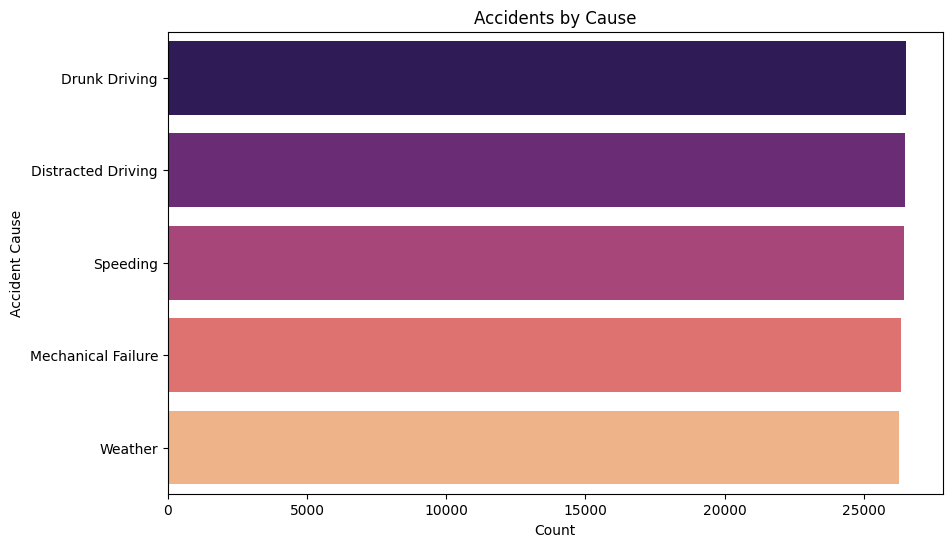

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Accident Cause"], order=df["Accident Cause"].value_counts().index, palette="magma")
plt.title("Accidents by Cause")
plt.xlabel("Count")
plt.ylabel("Accident Cause")
plt.show()

Lima penyebab utama (Drunk Driving, Distracted Driving, Speeding, Mechanical Failure, Weather) memiliki jumlah kecelakaan yang sangat seimbang.

## Kesimpulan

Hasil eksplorasi data menunjukkan bahwa dataset kecelakaan jalan ini sangat bersih, tanpa missing values maupun duplikasi, serta memiliki distribusi fitur numerik yang relatif merata dan independen satu sama lain berdasarkan korelasi yang sangat rendah. Fitur kategorikal seperti negara, bulan, hari, waktu, lokasi (urban/rural), jenis jalan, kondisi cuaca, kelompok usia, gender, kondisi kendaraan, tingkat keparahan, penyebab kecelakaan, dan region semuanya memiliki distribusi yang seimbang, menandakan tidak adanya dominasi kategori tertentu. Analisis univariate memperlihatkan bahwa nilai-nilai numerik seperti visibility, speed limit, alcohol level, traffic volume, medical cost, hingga economic loss tersebar merata tanpa outlier ekstrem. Bivariate analysis antara tahun dan jumlah kecelakaan menunjukkan tren yang stabil dari 2000–2024 tanpa perubahan signifikan. Perbandingan kategori dengan numerik—misalnya severity terhadap alcohol level, response time, atau fatigue—juga menunjukkan perbedaan yang sangat kecil. Secara keseluruhan, dataset ini bersifat synthetic-balanced, dengan tiap fitur memiliki distribusi hampir seragam, sehingga baik untuk eksperimen machine learning, namun pola-pola yang biasanya ditemukan pada data real-world (misalnya musim, jam sibuk, cuaca ekstrem) tidak tampak karena karakter data yang sengaja diratakan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 1. Standarisasi Fitur

In [24]:
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

Melakukan standardisasi (standard scaling) pada semua kolom numerik.
df_scaled dibuat sebagai salinan dari dataframe asli agar data awal tidak berubah.

Kemudian StandardScaler menghitung mean dan standar deviasi setiap kolom numerik, lalu mengubah nilainya menjadi skala baru dengan mean = 0 dan standar deviasi = 1.

## 2. Cek Outlier

In [25]:
# Function to handle outliers in a given numerical column
def handle_outliers(df, column):
    median_value = df[column].median()  # Compute the median value
    q1 = df[column].quantile(0.25)  # First quartile (25%)
    q3 = df[column].quantile(0.75)  # Third quartile (75%)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Upper bound for outliers

    # Replace outliers with the median value
    df.loc[:, column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

    print(f"Outliers in '{column}' handled successfully!")
    return df

In [26]:
df = handle_outliers(df, 'Number of Fatalities')
df = handle_outliers(df, 'Number of Injuries')
df = handle_outliers(df, 'Emergency Response Time')
df = handle_outliers(df, 'Traffic Volume')
df = handle_outliers(df, 'Medical Cost')
df = handle_outliers(df, 'Economic Loss')
df = handle_outliers(df, 'Number of Vehicles Involved')
df = handle_outliers(df, 'Driver Alcohol Level')
df = handle_outliers(df, 'Pedestrians Involved')
df = handle_outliers(df, 'Cyclists Involved')
df = handle_outliers(df, 'Insurance Claims')
df = handle_outliers(df, 'Population Density')

Outliers in 'Number of Fatalities' handled successfully!
Outliers in 'Number of Injuries' handled successfully!
Outliers in 'Emergency Response Time' handled successfully!
Outliers in 'Traffic Volume' handled successfully!
Outliers in 'Medical Cost' handled successfully!
Outliers in 'Economic Loss' handled successfully!
Outliers in 'Number of Vehicles Involved' handled successfully!
Outliers in 'Driver Alcohol Level' handled successfully!
Outliers in 'Pedestrians Involved' handled successfully!
Outliers in 'Cyclists Involved' handled successfully!
Outliers in 'Insurance Claims' handled successfully!
Outliers in 'Population Density' handled successfully!


Kode ini membuat fungsi handle_outliers() yang mendeteksi outlier pada sebuah kolom numerik menggunakan metode IQR (Interquartile Range).

Jika ada nilai yang berada di luar batas tersebut, nilai tersebut diganti dengan median kolom agar distribusi tetap stabil tanpa menghapus data.

## 3. Clean Categorical Column

In [27]:
def clean_text_columns(df):
    for col in df.select_dtypes(include=['object']):
        df.loc[:, col] = df[col].str.lower().str.strip()

    print("Text columns cleaned successfully!")
    return df

In [28]:
df = clean_text_columns(df)

Text columns cleaned successfully!


Fungsi clean_text_columns() membersihkan semua kolom bertipe teks (object) dengan mengubah seluruh isi teks menjadi huruf kecil dan menghapus spasi berlebih di awal atau akhir.

## 4. Encoding Kolom Kategorikal

In [33]:
label_encoders = {}

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    original_values = df[column].unique()
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    encoded_values = df[column].unique()
    decoded_values = label_encoders[column].inverse_transform(encoded_values)

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


Country Encoding and Decoding:
9 -> usa
8 -> uk
2 -> canada
5 -> india
3 -> china
6 -> japan
7 -> russia
1 -> brazil
4 -> germany
0 -> australia

Month Encoding and Decoding:
10 -> october
2 -> december
5 -> july
8 -> may
7 -> march
1 -> august
0 -> april
11 -> september
4 -> january
3 -> february
6 -> june
9 -> november

Day of Week Encoding and Decoding:
5 -> tuesday
2 -> saturday
3 -> sunday
1 -> monday
0 -> friday
4 -> thursday
6 -> wednesday

Time of Day Encoding and Decoding:
1 -> evening
0 -> afternoon
3 -> night
2 -> morning

Urban/Rural Encoding and Decoding:
0 -> rural
1 -> urban

Road Type Encoding and Decoding:
2 -> street
0 -> highway
1 -> main road

Weather Conditions Encoding and Decoding:
4 -> windy
3 -> snowy
0 -> clear
2 -> rainy
1 -> foggy

Driver Age Group Encoding and Decoding:
0 -> 18-25
2 -> 41-60
1 -> 26-40
4 -> <18
3 -> 61+

Driver Gender Encoding and Decoding:
1 -> male
0 -> female

Vehicle Condition Encoding and Decoding:
2 -> poor
1 -> moderate
0 -> good

A

Untuk setiap kolom, dibuat satu LabelEncoder yang mengubah nilai kategori menjadi angka.
Setelah encoding, kode menampilkan pasangan encoded → decoded untuk memastikan bahwa setiap angka benar-benar sesuai dengan kategori aslinya.